In [20]:
import numpy as np
import pandas as pd
import pickle
import random
from PIL import Image 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import weightedcalcs as wc
import matplotlib.patches as mpatches
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

In [3]:
with open('../data/processed/df.pickle', 'rb') as file:
     all_ = pickle.load( file)
with open('../data/processed/target.pickle', 'rb') as file:
     y = pickle.load(file)
with open('../data/processed/selected_feat.pickle', 'rb') as file:
     slctd_feat = pickle.load(file)

In [4]:
col_list = slctd_feat.columns
col_list

Index(['imiss_c_2016', 'imiss_f_2016', 'imiss_l_2016', 'imiss_p_2016',
       'imiss_u_2016', 'imiss_x_2016', 'imiss_y_2016'],
      dtype='object')

In [5]:
slctd_feat['weight'] = all_.weight
slctd_feat['target'] = y

In [6]:
weight = slctd_feat['weight']
calc = wc.Calculator('weight')

In [7]:
grouped = slctd_feat.groupby('target')

In [8]:
list = ['immigration', 'terrorism', 'climate change',
        'the budget deficit', 'the size of government', 'racial equality', 'gender equality']
for ind, col in enumerate(col_list):
    freq = calc.distribution(slctd_feat, col).round(3)
    g_freq = calc.distribution(grouped, col).round(3)

    print(list[ind], freq, '\n',
         list[ind], g_freq)

immigration imiss_c_2016
1.0    0.447
2.0    0.359
3.0    0.132
4.0    0.033
8.0    0.029
Name: weight, dtype: float64 
 immigration imiss_c_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.304  0.427  0.200  0.038  0.030
2.0           0.616  0.295  0.058  0.020  0.011
3.0           0.399  0.347  0.143  0.047  0.063
terrorism imiss_f_2016
1.0    0.566
2.0    0.285
3.0    0.087
4.0    0.035
8.0    0.027
Name: weight, dtype: float64 
 terrorism imiss_f_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.410  0.352  0.158  0.051  0.029
2.0           0.775  0.190  0.012  0.006  0.016
3.0           0.464  0.339  0.093  0.060  0.044
climate change imiss_l_2016
1.0    0.374
2.0    0.235
3.0    0.170
4.0    0.195
8.0    0.025
Name: weight, dtype: float64 
 climate change imiss_l_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.657  0.

In [9]:
amrcns_dict = {'Terrorism': .566,
             'The Budget Deficit': .491,
             'Immigration': .447,
             'The Size of Government': .393,
             'Racial Equality': .378,
             'Climate Change': .374,
            'Gender Equality': .341
             }

clnt_dict = {'Terrorism': 0.410,
             'The Budget Deficit':0.292,
             'Immigration':0.304 ,
             'The Size of Government':0.175,
             'Racial Equality': 0.601,
             'Climate Change': 0.657,
             'Gender Equality': .585}

trmp_dict = {'Terrorism': 0.775,
             'The Budget Deficit': .706,
             'The Size of Government':0.630,
             'Immigration':.616, 
             'Racial Equality': 0.191,
             'Climate Change': 0.115,
             'Gender Equality': 0.124
             }


In [10]:
# freq_dict = { 
#              'gender equality': .341, 'climate change': .374,'racial equality': .378,'the size of government': .393,
#              'immigration': .447, 
#              'the budget deficit': .491, 'terrorism': .566}

In [11]:
amrcns_dict
list_ = []
val_list = []
for key,val in amrcns_dict.items():
    list_.append(key)
    val_list.append(val)

In [12]:
clnt_dict
list_ = []
val_list_clnt = []
for key,val in clnt_dict.items():
    list_.append(key)
    val_list_clnt.append(val)

In [13]:
trmp_dict
list_ = []
val_list_trmp = []
for key,val in trmp_dict.items():
    list_.append(key)
    val_list_trmp.append(val)

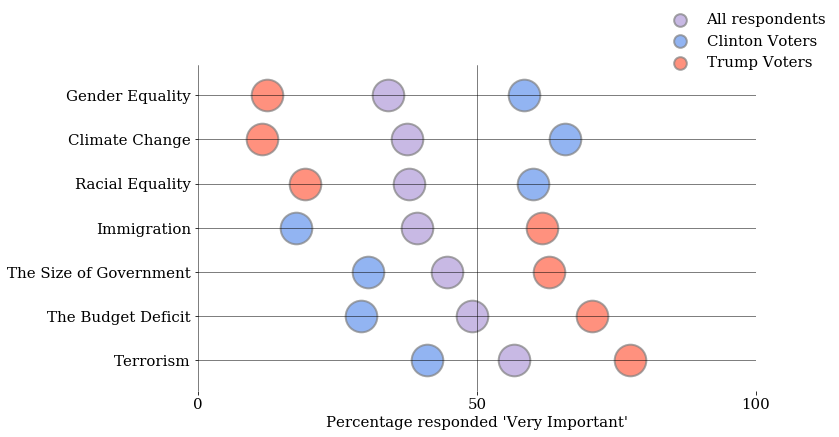

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x=val_list, y=list_, s=1000, c='#b19cd9',
            alpha=0.7, edgecolors="grey", linewidth=2, label='All respondents')
plt.scatter(x=val_list_clnt, y=list_, s=1000, c='cornflowerblue',
            alpha=0.7, edgecolors="grey", linewidth=2, label='Clinton Voters')
plt.scatter(x=val_list_trmp, y=list_, s=1000, c='tomato',
            alpha=0.7, edgecolors="grey", linewidth=2, label='Trump Voters')

plt.xlim(0, 1)
ax.get_xaxis().set_visible(True)
ax.set_xticks([0, .5, 1])
ax.set_xticklabels([0, 50, 100], fontsize=15)
ax.set_xlabel('Percentage responded \'Very Important\'', fontsize=15)
ax.set_yticklabels(labels=list_, fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.set_title('How important are these issues?', fontsize=16, y=1.05, weight='medium')
ax.grid(linestyle='-', linewidth='0.5', color='black')

# green_patch = mpatches.Patch(color='mediumseagreen', label='All Respondents')
# blue_patch = mpatches.Circle(color='cornflowerblue', label='Clinton Voters', xy=(1.15, 1.2), radius=5)
# red_patch = mpatches.Patch(color='tomato', label='Trump Voters')

ax.legend(frameon=False, loc='upper right', fontsize=15, bbox_to_anchor=(1.15,1.2), markerscale=.4)
plt.savefig('../reports/figures/bubble_chrt.png')

plt.show()